In [78]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl

In [50]:
data_dir = '/epyc/data/gaia_dr2_sso'
source_files = [f for f in os.listdir(data_dir) if "Source" in f]

# Read source files. 
sources = []
for f in source_files:
    sources.append(pd.read_csv(os.path.join(data_dir, f)))

# Join split catalogs into one.
print(len(sources))
for s in sources:
    print(len(s))
sources = pd.concat(sources)
print(len(sources))

4
2465
3862
3997
3775
14099


In [51]:
data_dir = '/epyc/data/gaia_dr2_sso'
obs_files = [f for f in os.listdir(data_dir) if "Observation" in f]

# Read obs files
obs = []
for f in obs_files:
    obs.append(pd.read_csv(os.path.join(data_dir, f)))
# Join split catalogs into one.
print(len(obs))
for o in obs:
    print(len(o))
obs = pd.concat(obs)
print(len(obs))

4
345784
546020
545878
540020
1977702


In [52]:
# Read in some external catalogs - LCDB and SDSS and ASTORB
import sys
sys.path.extend(['/data/epyc/users/lynnej/ssdpu'])

import catalog_utils as cu

In [53]:
lcdb = cu.read_lcdb('/data/epyc/users/lynnej/ssdpu/LCLIST_PUB_2018MAR/LC_SUM_PUB.TXT')

In [55]:
astorb = cu.read_astorb('/data/epyc/users/lynnej/ssdpu/catalogs/astorb.dat')

In [56]:
sdss = cu.read_sdss_moc('/data/epyc/users/lynnej/ssdpu/catalogs/ADR4.dat')

In [57]:
matched = sources.merge(astorb, how='inner', left_on='number_mp', right_on='numberId')
print(len(matched), len(sources))

14099 14099


In [58]:
# There aren't SDSS colors for all of these objects in the MOC ... most matches on numberId
colors = matched.merge(sdss, how='inner', on='numberId')
print(len(matched), len(sdss), len(colors))

14099 471569 8921


In [65]:
colors[['designation_x', 'designation_y']]

,designation_x,designation_y
0,2000_EG39,2000_EG39
1,2000_EF47,2000_EF47
2,2000_EF47,2000_EF47
3,2000_EF47,2000_EF47
4,2000_EN84,2000_EN84
5,2000_EN84,2000_EN84
6,2000_EF151,2000_EF151
7,2000_EF151,2000_EF151
8,2000_FO25,2000_FO25
9,2000_FO25,2000_FO25


In [68]:
periods = matched.merge(lcdb, how='inner', left_on='designation', right_on='Name')
print(len(matched), len(lcdb), len(periods))

14099 19966 4477


In [71]:
periods = colors.merge(lcdb, how='inner', left_on='designation_x', right_on='Name')
print(len(colors), len(lcdb), len(periods))

8921 19966 2499


-2.96


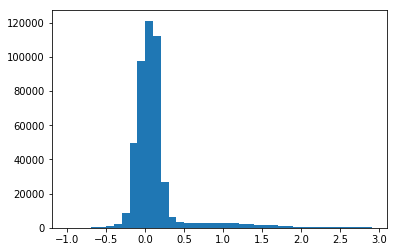

In [93]:
n, b, p = plt.hist(sdss.sdssa, bins=np.arange(-1, 3, 0.1))
print(sdss.sdssa.min())

Text(0,0.5,'Eccentricity')

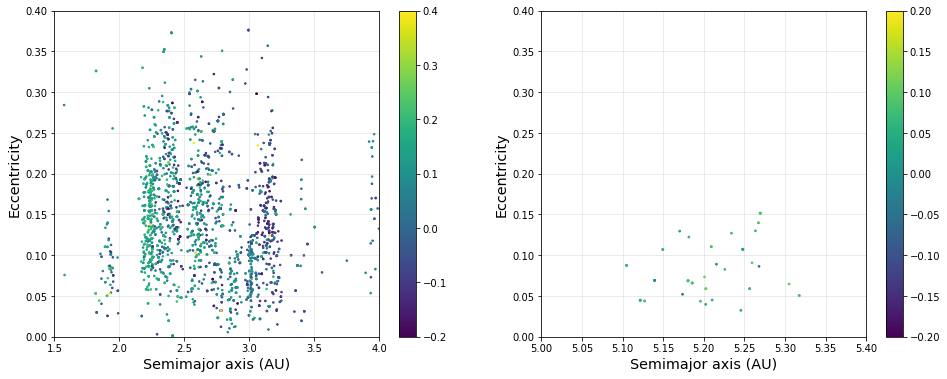

In [123]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(periods.a_x, periods.e_x, c=periods.sdssa, vmin=-0.2, vmax=0.4, marker='.', s=10)
plt.colorbar()
plt.xlim(1.5, 4)
plt.grid(True, alpha=0.3)
plt.ylim(0, 0.4)
plt.xlabel("Semimajor axis (AU)", fontsize='x-large')
plt.ylabel("Eccentricity", fontsize='x-large')
plt.subplot(1, 2, 2)
plt.scatter(periods.a_x, periods.e_x, c=periods.sdssa, vmin=-0.2, vmax=0.2, marker='.', s=12)
plt.colorbar()
plt.xlim(5, 5.4)
plt.grid(True, alpha=0.3)
plt.ylim(0, .4)
plt.xlabel("Semimajor axis (AU)", fontsize='x-large')
plt.ylabel("Eccentricity", fontsize='x-large')

Text(0,0.5,'Inclination')

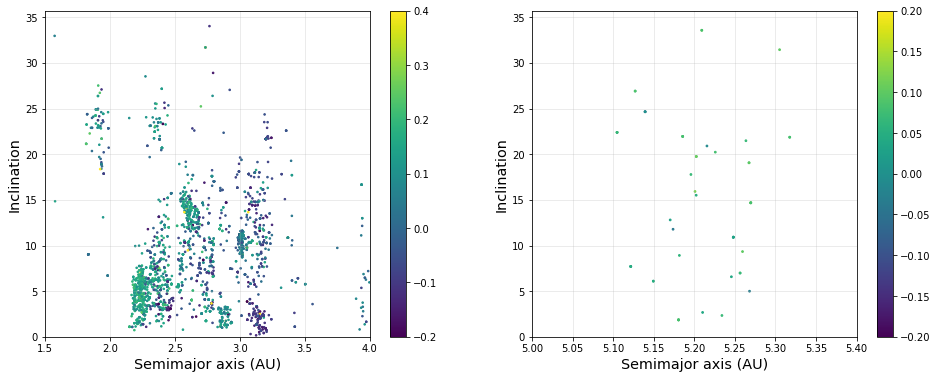

In [122]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.scatter(periods.a_x, periods.inc_x, c=periods.sdssa, vmin=-0.2, vmax=0.4, marker='.', s=10)
plt.colorbar()
plt.xlim(1.5, 4)
plt.grid(True, alpha=0.3)
plt.ylim(ymin=0)
plt.xlabel("Semimajor axis (AU)", fontsize='x-large')
plt.ylabel("Inclination", fontsize='x-large')
plt.subplot(1, 2, 2)
plt.scatter(periods.a_x, periods.inc_x, c=periods.sdssa, vmin=-0.2, vmax=0.2, marker='.', s=12)
plt.colorbar()
plt.xlim(5, 5.4)
plt.grid(True, alpha=0.3)
plt.ylim(ymin=0)
plt.xlabel("Semimajor axis (AU)", fontsize='x-large')
plt.ylabel("Inclination", fontsize='x-large')

In [124]:
matched.query('a > 7')

,solution_id,source_id,num_of_obs,number_mp,denomination,numberId,designation,computer,H,G1,...,date_comp,ceu,deltaceu,ceudate,peumax,peumaxdate,peumax10,peumax10date,peumax2,peumax2date
2448,4166707207534977073,-4283606216,104,136108,haumea,136108,Haumea,L.H. Wasserman,0.2,0.15,...,20180507,0.024,0.000015,20180531,0.034,20190122,0.093,20280206,0.092,20280207
2449,4166707207534977073,-4283602576,78,136472,makemake,136472,Makemake,L.H. Wasserman,-0.2,0.15,...,20180507,0.025,0.000034,20180531,0.025,20180714,0.090,20280112,0.090,20280112


In [125]:
haumea = obs.query('number_mp == 136108')

In [126]:
makemake = obs.query('number_mp == 136472')

<Container object of 3 artists>

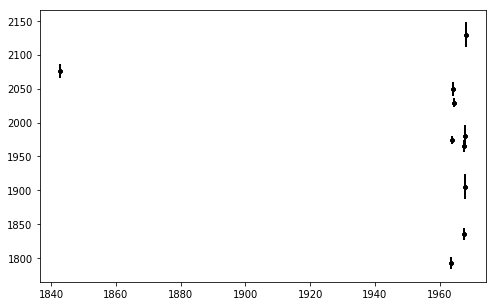

In [127]:
plt.figure(figsize=(8, 5))
plt.errorbar(haumea.epoch, haumea.g_flux, yerr=haumea.g_flux_error, color='k', linestyle='', marker='.')

<Container object of 3 artists>

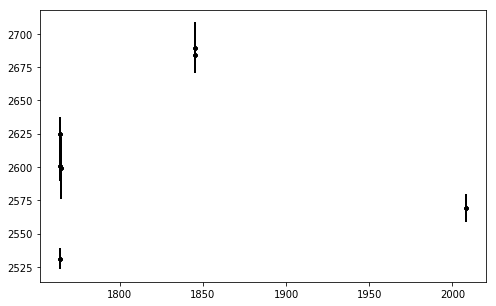

In [128]:
plt.figure(figsize=(8, 5))
plt.errorbar(makemake.epoch, makemake.g_flux, yerr=makemake.g_flux_error, color='k', linestyle='', marker='.')

Text(0,0.5,'Number of Gaia SSO sources')

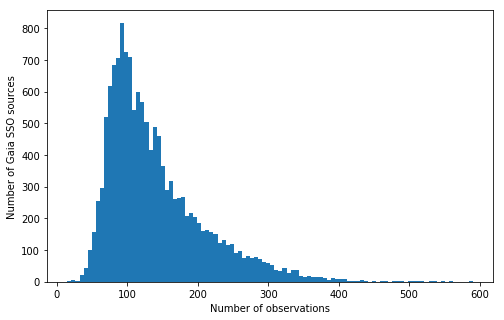

In [129]:
plt.figure(figsize=(8, 5))
n, b, p = plt.hist(sources.num_of_obs, bins=100)
plt.xlabel('Number of observations')
plt.ylabel('Number of Gaia SSO sources')

Text(0.5,1,'Objects with more than 400 observations')

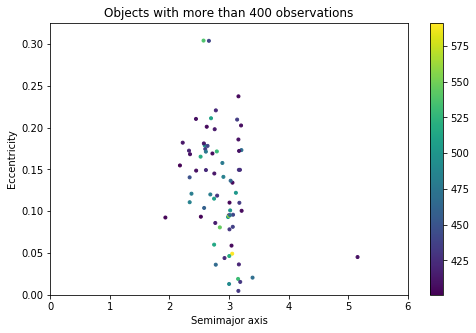

In [130]:
x = matched.query('num_of_obs > 400')
plt.figure(figsize=(8, 5))
plt.scatter(x.a, x.e, c=x.num_of_obs, marker='.')
plt.colorbar()
plt.xlabel('Semimajor axis')
plt.ylabel('Eccentricity')
plt.xlim(0, 6)
plt.ylim(ymin=0)
plt.title('Objects with more than 400 observations')

In [131]:
matched.query('number_mp == 6072')[['a', 'e', 'inc']]

,a,e,inc
7640,3.152425,0.018999,9.164101


In [132]:
hh = obs.query('number_mp == 6072')

<Container object of 3 artists>

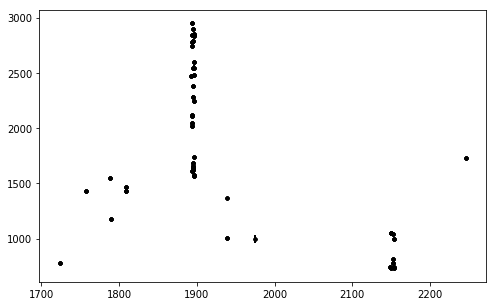

In [133]:
plt.figure(figsize=(8, 5))
plt.errorbar(hh.epoch, hh.g_flux, yerr=hh.g_flux_error, color='k', linestyle='', marker='.')

In [134]:
lcdb.query('Name == "Hooghoudt"')[['Period', 'AmpMin', 'AmpMax']]

,Period,AmpMin,AmpMax
4133,4.268,0.63,0.67


In [135]:
sources.query('denomination == "hooghoudt"')

,solution_id,source_id,num_of_obs,number_mp,denomination
1313,4166707207534977073,-4284906576,531,6072,hooghoudt
